### MLP (multi-layer perceptron, fully-connected)
#### - regression, classification

### 1. Regression
#### - use the last score as prediction score
#### - datasets: https://keras.io/api/datasets/

#### - Boston housing price dataset (regression)


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import copy

## Dataset load
(train_x, train_y), (test_x, test_y) = keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=1234)
## train-test split


65536/57026 [==================================] - 0s 0us/step


In [ ]:
## Data sample
print("training shape")
print(train_x.shape)
print(train_y.shape)

print("test_shape")
print(test_x.shape)
print(test_y.shape)

training shape
(404, 13)
(404,)
test_shape
(102, 13)
(102,)


## 1.1 데이터 *전처리* (정규화)
Standard deviation에 의한 정규화

In [ ]:
## Normalization 
x_mean = train_x.mean(axis=0)
x_std = train_x.std(axis=0)
train_x -= x_mean
train_x /= x_std
test_x -= x_mean
test_x /= x_std

y_mean = train_y.mean(axis=0)
y_std = train_y.std(axis=0)
test_y_orig = copy.copy(test_y)
train_y -= y_mean
train_y /= y_std
test_y -= y_mean
test_y /= y_std
#########################################
print("y_mean", y_mean)
print("y_std", y_std)
print("-"*30)
print("y_answer", test_y_orig[0:5])
print("y_answer(normalized)", test_y[0:5])
print("train_x_features", train_x[0])
print("train_y_features", train_y[0])

y_mean 22.42673267326732
y_std 9.163389176814665
------------------------------
y_answer [24.  22.1 17.5 19.3 24.8]
y_answer(normalized) [ 0.17169055 -0.03565631 -0.53765398 -0.34122011  0.25899449]
train_x_features [-0.44458463  0.23504295 -1.42333199 -0.27288841 -1.20937482  1.14591257
 -0.35066532  2.5278866  -0.75812654 -1.14966148  0.06421968  0.40690187
 -0.66139028]
train_y_features 1.153859900819809


In [ ]:
## Model definition
model = keras.Sequential([
  keras.layers.Dense(units=64, activation='elu', input_shape=(13,)), 
  keras.layers.Dense(units=64, activation='elu'), 
  keras.layers.Dense(units=32, activation='elu'), 
  keras.layers.Dense(units=1)
])

model.compile(optimizer=keras.optimizers.Adam(lr=0.07), loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,169
Trainable params: 7,169
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
## Train setting
batch_size = 32
epochs = 200

history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, validation_split=0.25, callbacks=[keras.callbacks.EarlyStopping(patience=20, monitor='val_loss')])



Epoch 1/200
10/10 [==============================] - 3s 20ms/step - loss: 67.2604 - mse: 67.2604 - val_loss: 5.1196 - val_mse: 5.1196
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 3.1655 - mse: 3.1655 - val_loss: 1.7656 - val_mse: 1.7656
Epoch 3/200
10/10 [==============================] - 0s 21ms/step - loss: 1.2025 - mse: 1.2025 - val_loss: 1.7673 - val_mse: 1.7673
Epoch 4/200
10/10 [==============================] - 0s 13ms/step - loss: 1.6741 - mse: 1.6741 - val_loss: 1.1173 - val_mse: 1.1173
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.7053 - mse: 0.7053 - val_loss: 0.6175 - val_mse: 0.6175
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3584 - mse: 0.3584 - val_loss: 0.3453 - val_mse: 0.3453
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3059 - mse: 0.3059 - val_loss: 0.3856 - val_mse: 0.3856
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 0.284

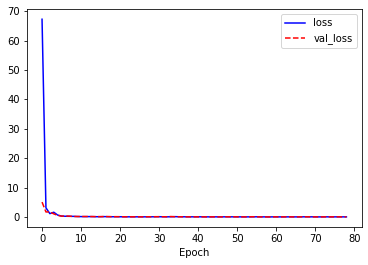

In [ ]:
## plot training progress
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
## evaluate on the test set.
y = model.predict(test_x)
print(y)
print(y_std)
print(y_mean)
y_ = (y * y_std) + y_mean
print((y[0:5]).flatten())
print((y_[0:5]).flatten()) # *1000 달러


[[-0.13298208]
 [-0.05972606]
 [-0.5185575 ]
 [-0.57670814]
 [-0.09462661]
 [ 0.8935842 ]
 [ 1.1077273 ]
 [-0.3687933 ]
 [-0.65234715]
 [-1.3941162 ]
 [ 0.6219062 ]
 [-0.33960587]
 [-0.5440064 ]
 [-0.3614362 ]
 [ 0.19571042]
 [-1.0915151 ]
 [-0.7951378 ]
 [-0.683363  ]
 [ 1.1825589 ]
 [-0.66652423]
 [-0.27061993]
 [-0.07932407]
 [ 0.21617073]
 [-0.6145939 ]
 [-0.5639964 ]
 [-0.32373863]
 [-1.1170533 ]
 [-0.16628832]
 [-0.12122017]
 [-1.3049984 ]
 [-0.40618163]
 [ 0.93604845]
 [-0.37865704]
 [-0.32348675]
 [ 0.02049237]
 [ 0.9190501 ]
 [ 0.24973118]
 [ 0.78936255]
 [-0.5908124 ]
 [ 1.0400114 ]
 [-0.7734886 ]
 [-0.04573089]
 [-0.29097778]
 [-0.12594277]
 [-0.01465076]
 [-0.02706236]
 [-1.5485504 ]
 [-0.79005986]
 [-1.1698883 ]
 [-0.5820001 ]
 [ 0.12280101]
 [-0.5362645 ]
 [-0.46689922]
 [-0.08307391]
 [-0.9034317 ]
 [-0.87781435]
 [ 0.91707087]
 [ 1.2828207 ]
 [ 0.85982275]
 [ 0.91455805]
 [-0.5140541 ]
 [-0.2974611 ]
 [-0.62549   ]
 [-0.7582577 ]
 [ 1.1008056 ]
 [ 2.4149446 ]
 [-0.65962

In [ ]:
## print prediction data
print(np.round(y_[0:20].flatten(), 1))
print(test_y_orig[0:20])

[23.9 23.4 18.4 18.5 22.7 30.8 32.4 29.2 11.3 15.8 31.2 22.2 19.  25.5
 23.9 10.8 22.4 14.7 26.2 17.1]
[24.  22.1 17.5 19.3 24.8 36.2 32.2 15.  13.5  6.3 29.4 20.6 17.6 16.6
 23.7 11.5 20.1 18.1 23.9 27.5]


In [ ]:
## print answer(test_y) data


In [ ]:
## compare prediction to answer

Using RMSE (root mean square error)

In [ ]:
## RMSE value
print("prediction", np.round(y_.flatten()[0:5],1))
print("answer", test_y_orig[0:5])
print("-"*30)
print((y_.flatten() - test_y_orig)[0:5])
print("-"*30)
print('max error:', (y_.flatten() - test_y_orig).max())
print('min error:', (y_.flatten() - test_y_orig).min())

RMSE = np.sqrt(np.mean(np.square(y_.flatten() - test_y_orig)))
print('RMSE: ', RMSE)


prediction [23.9 23.4 18.4 18.5 22.7]
answer [24.  22.1 17.5 19.3 24.8]
------------------------------
[-0.07685471  1.32778969  0.911026   -0.78650742 -2.14705544]
------------------------------
max error: 14.230611801147461
min error: -26.606876373291016
RMSE:  4.906571145048069


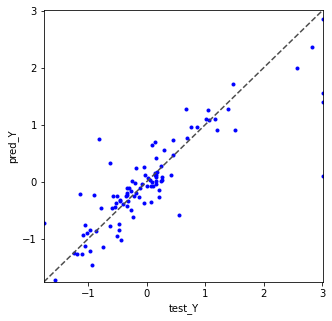

In [ ]:
## plot results
import matplotlib.pyplot as plt

pred_y = model.predict(test_x)

plt.figure(figsize=(5,5))
plt.plot(test_y, pred_y, 'b.')
plt.axis([min(test_y), max(test_y), min(test_y), max(test_y)])

# y=x에 해당하는 대각선
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()
